# Importing Libraries

In [1]:
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Checking CUDA 

In [2]:
torch.cuda.is_available()

True

In [3]:
device = torch.device('cuda')

# Loading Data 

In [4]:
transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #Normalizing image
    ])

train = datasets.CIFAR10('data', train=True, download=True, transform=transform)
test = datasets.CIFAR10('data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=64, num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [5]:
train[0]

(tensor([[[-0.5373, -0.5373, -0.5373,  ...,  0.1608,  0.1608,  0.1608],
          [-0.5373, -0.5373, -0.5373,  ...,  0.1608,  0.1608,  0.1608],
          [-0.5373, -0.5373, -0.5373,  ...,  0.1608,  0.1608,  0.1608],
          ...,
          [ 0.3882,  0.3882,  0.3882,  ..., -0.0353, -0.0353, -0.0353],
          [ 0.3882,  0.3882,  0.3882,  ..., -0.0353, -0.0353, -0.0353],
          [ 0.3882,  0.3882,  0.3882,  ..., -0.0353, -0.0353, -0.0353]],
 
         [[-0.5137, -0.5137, -0.5137,  ..., -0.0275, -0.0275, -0.0275],
          [-0.5137, -0.5137, -0.5137,  ..., -0.0275, -0.0275, -0.0275],
          [-0.5137, -0.5137, -0.5137,  ..., -0.0275, -0.0275, -0.0275],
          ...,
          [ 0.1294,  0.1294,  0.1294,  ..., -0.2784, -0.2784, -0.2784],
          [ 0.1294,  0.1294,  0.1294,  ..., -0.2784, -0.2784, -0.2784],
          [ 0.1294,  0.1294,  0.1294,  ..., -0.2784, -0.2784, -0.2784]],
 
         [[-0.5059, -0.5059, -0.5059,  ..., -0.1922, -0.1922, -0.1922],
          [-0.5059, -0.5059,

In [6]:
next(iter(test_loader))

[tensor([[[[ 0.2392,  0.2392,  0.2392,  ..., -0.0902, -0.0902, -0.0902],
           [ 0.2392,  0.2392,  0.2392,  ..., -0.0902, -0.0902, -0.0902],
           [ 0.2392,  0.2392,  0.2392,  ..., -0.0902, -0.0902, -0.0902],
           ...,
           [-0.5765, -0.5765, -0.5765,  ..., -0.8353, -0.8353, -0.8353],
           [-0.5765, -0.5765, -0.5765,  ..., -0.8353, -0.8353, -0.8353],
           [-0.5765, -0.5765, -0.5765,  ..., -0.8353, -0.8353, -0.8353]],
 
          [[-0.1216, -0.1216, -0.1216,  ..., -0.3333, -0.3333, -0.3333],
           [-0.1216, -0.1216, -0.1216,  ..., -0.3333, -0.3333, -0.3333],
           [-0.1216, -0.1216, -0.1216,  ..., -0.3333, -0.3333, -0.3333],
           ...,
           [-0.1608, -0.1608, -0.1608,  ..., -0.4745, -0.4745, -0.4745],
           [-0.1608, -0.1608, -0.1608,  ..., -0.4745, -0.4745, -0.4745],
           [-0.1608, -0.1608, -0.1608,  ..., -0.4745, -0.4745, -0.4745]],
 
          [[-0.6157, -0.6157, -0.6157,  ..., -0.7412, -0.7412, -0.7412],
           [-

In [7]:
#Storing the name of labels to their respective index

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
#Getting First batch of test_loader

images, labels = next(iter(test_loader)) 
print(images.shape)

torch.Size([64, 3, 227, 227])


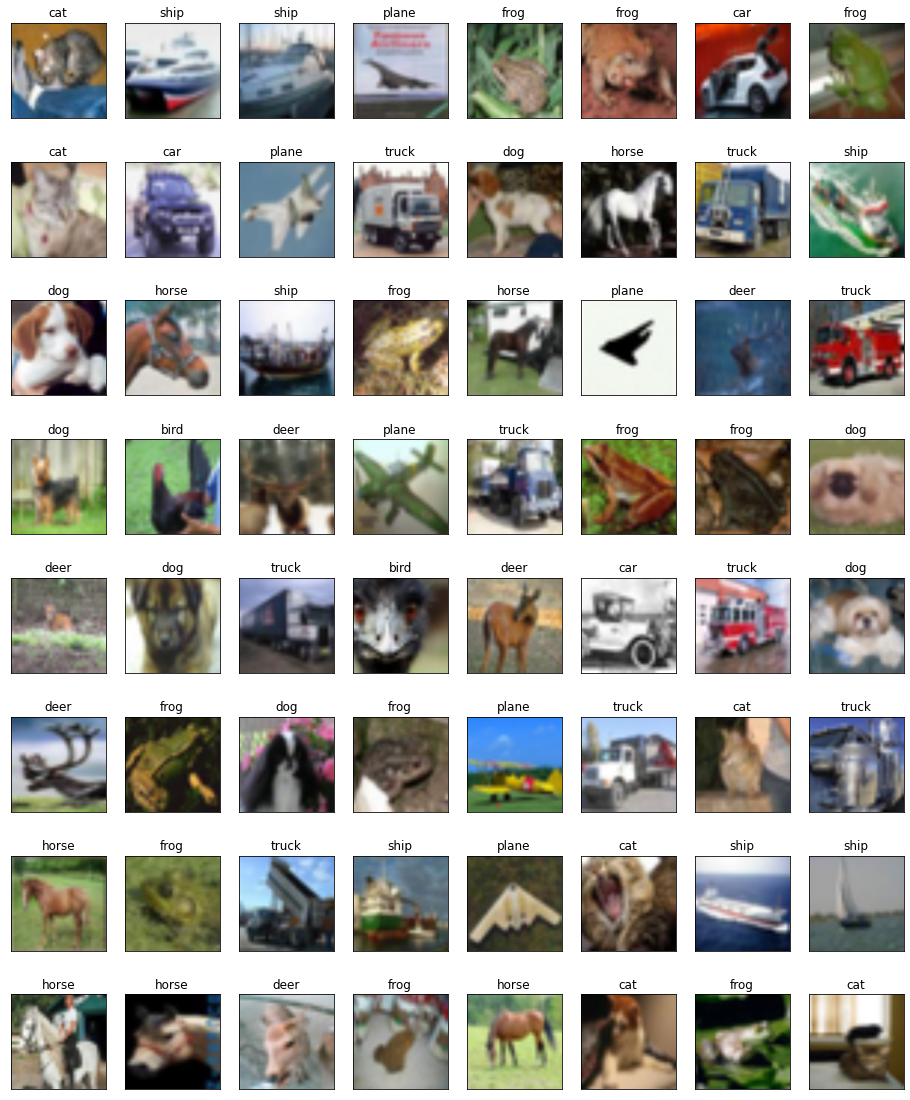

In [9]:
#plotting the first batch of test_loader

fig = plt.figure(figsize = (16, 20))

for i in range(64):
    subplt = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    
    #Un-normalising image
    img = images[i]/2 + 0.5 
    
    #plotting image
    plt.imshow(np.transpose(img, (1, 2, 0)))
    subplt.set_title(classes[labels[i]])

# MODEL

In [10]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(3, 96, 11, 4), # in_channels, out_channels, kernel_size, stride, padding
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # kernel_size, stride
              
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),

            nn.Conv2d(256, 384, 3, 1, 1),
            nn.ReLU(),
            
            nn.Conv2d(384, 384, 3, 1, 1),
            nn.ReLU(),
            
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
        self.forward_prop = nn.Sequential(
            nn.Linear(256*6*6, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10),
        )

    def forward(self, X):
        input_x = self.block(X)
        output = self.forward_prop(input_x.view(X.shape[0], -1))
        return output

# Training Data

In [11]:
model = AlexNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.05)
epochs = 10

In [12]:
losses = []

for i in range(epochs):
    total_loss, correct = 0,0
    for x, y in train_loader:
        
        x = x.to(device)
        y = y.to(device)
        
        pred = model(x)
        loss = loss_fn(pred , y)
        total_loss += loss.item() #Adding loss of each batch
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        _, predicted = torch.max(pred, 1) #Getting the index with max probability
        correct += (predicted == y).sum().item()
        
    total_loss /= len(train_loader.dataset) # average of total loss of all batches
    losses.append(total_loss) #Collecting loss of each epoch for plotting graph
    
    correct /= len(train_loader.dataset)
    print(f"[=============Epochs: {i+1} ============]")
    print(f"Loss : {total_loss:.5f}")
    print(f"Accuracy : {correct:.5f}")

C:\Users\GAURAV\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[=============Epochs: 1============]
Loss : 0.03246
Accuracy : 0.22228
[=============Epochs: 2============]
Loss : 0.02438
Accuracy : 0.42708
[=============Epochs: 3============]
Loss : 0.01975
Accuracy : 0.54466
[=============Epochs: 4============]
Loss : 0.01570
Accuracy : 0.64480
[=============Epochs: 5============]
Loss : 0.01277
Accuracy : 0.71544
[=============Epochs: 6============]
Loss : 0.01061
Accuracy : 0.76306
[=============Epochs: 7============]
Loss : 0.00869
Accuracy : 0.80824
[=============Epochs: 8============]
Loss : 0.00706
Accuracy : 0.84372
[=============Epochs: 9============]
Loss : 0.00564
Accuracy : 0.87592
[=============Epochs: 10============]
Loss : 0.00450
Accuracy : 0.90026


# Plotting Loss Function

<function matplotlib.pyplot.show(close=None, block=None)>

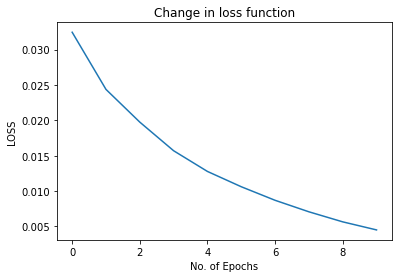

In [13]:
plt.plot(losses)
plt.title("Change in loss function")
plt.xlabel("No. of Epochs")
plt.ylabel("LOSS")
plt.show

# Testset Accuracy

In [14]:
classes_correct = np.zeros(10)
classes_sample = np.zeros(10)
correct = 0
test_pred = []
with torch.no_grad():
    
    for x_test, y_test in test_loader:
        x_test = x_test.to(device)
        y_test = y_test.to(device)
        outputs = model(x_test)
        
        _, predicted = torch.max(outputs, 1) 
        correct += (predicted == y_test).sum().item()
        
        for i in range(y_test.shape[0]):
            label = y_test[i]
            pred = predicted[i]
            test_pred.append(pred.item())
            if (pred == label):
                classes_correct[label] += 1 #No. of correct prediction of a particular object
            classes_sample[label] += 1 #Total No. of a particular object
        
    correct/=len(test_loader.dataset)
    print(f"Total Accuracy: {correct:.5f}")
    print('')
        
    for i in range(10):
        print(f"Accuracy of {classes[i]} : {classes_correct[i]/classes_sample[i]:.5f} ")
   
       

Total Accuracy: 0.78140

Accuracy of plane : 0.73100 
Accuracy of car : 0.88100 
Accuracy of bird : 0.76500 
Accuracy of cat : 0.69400 
Accuracy of deer : 0.77600 
Accuracy of dog : 0.59400 
Accuracy of frog : 0.85900 
Accuracy of horse : 0.84300 
Accuracy of ship : 0.84900 
Accuracy of truck : 0.82200 


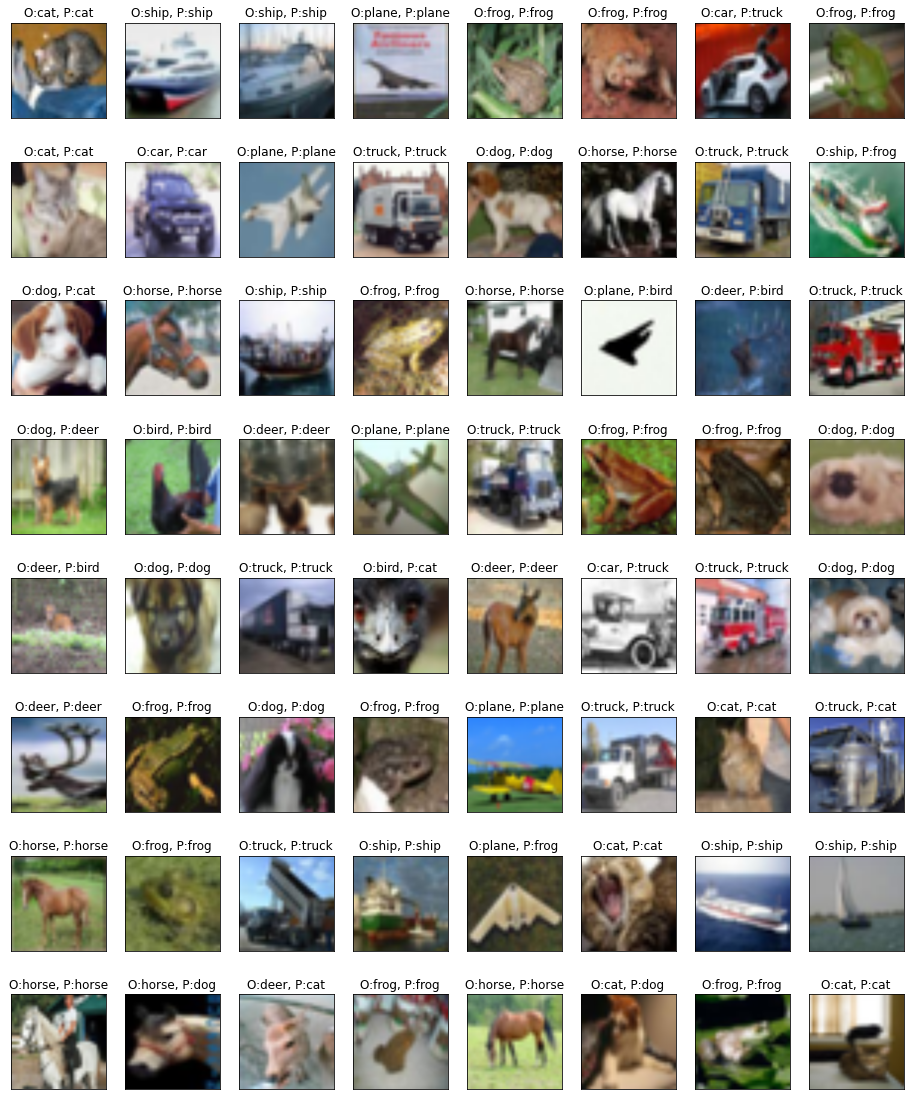

In [15]:
images, labels = next(iter(test_loader))

fig = plt.figure(figsize = (16, 20))

for i in range(64):
    subplt = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    img = images[i]/2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))
    subplt.set_title(f"O:{classes[labels[i]]}, P:{classes[test_pred[i]]}")